## Horas de estudio y aprobar el examen de Modelos Lineales Generalizados

In [1]:
Hours=c(0.5,0.75,1,1.25,1.5,1.75,1.75,2,2.25,2.5,2.75,3,3.25,3.5,4,4.25,4.5,4.75,5,5.5) #horas de estudio
Pass=c(0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1) #Aprobar el examen
# O es No aprobar
# 1 es Sí aprobar

In [2]:
df1=data.frame(Hours,Pass)
head(df1,10)

,Hours,Pass
,<dbl>,<dbl>
1,0.50,0
2,0.75,0
3,1.00,0
4,1.25,0
5,1.50,0
6,1.75,0
7,1.75,1
8,2.00,0
9,2.25,1


In [3]:
#Crear nuestro MLG con glm 
logit0=glm(Pass~Hours,data=df1,family='binomial') #en rls o rlm, la función es lm
#logit0 es un objeto glm 
summary(logit0)


Call:
glm(formula = Pass ~ Hours, family = "binomial", data = df1)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.70557  -0.57357  -0.04654   0.45470   1.82008  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -4.0777     1.7610  -2.316   0.0206 *
Hours         1.5046     0.6287   2.393   0.0167 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 27.726  on 19  degrees of freedom
Residual deviance: 16.060  on 18  degrees of freedom
AIC: 20.06

Number of Fisher Scoring iterations: 5


In [4]:
logLik(logit0) #Esto es la verosimilitud del modelo log0

'log Lik.' -8.029878 (df=2)

In [5]:
-2*logLik(logit0) #Esto es la devianza del modelo log0 (-2*logLik(log0))

'log Lik.' 16.05976 (df=2)

### Construir el modelo nulo de regresión logística para df1

In [6]:
logit_nulo=glm(Pass~1,data=df1,family='binomial')
summary(logit_nulo)


Call:
glm(formula = Pass ~ 1, family = "binomial", data = df1)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.177  -1.177   0.000   1.177   1.177  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -9.930e-17  4.472e-01       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 27.726  on 19  degrees of freedom
Residual deviance: 27.726  on 19  degrees of freedom
AIC: 29.726

Number of Fisher Scoring iterations: 2


In [7]:
logLik(logit_nulo)

'log Lik.' -13.86294 (df=1)

In [8]:
library(lmtest)

Warning message:
"package 'lmtest' was built under R version 4.0.5"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.0.5"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [9]:
lrtest(logit0,logit_nulo)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,-8.029878,NA,NA,NA
2,1,-13.862944,-1,11.66613,0.0006364826


In [10]:
#Deviance
with(logit0,null.deviance-deviance) #pull 

[1] 11.66613

In [11]:
logit0$null.deviance-logit0$deviance

[1] 11.66613

In [12]:
with(logit0,pchisq(null.deviance-deviance,df.null-df.residual,lower.tail=FALSE))

[1] 0.0006364826

In [13]:
class(logit0)

[1] "glm" "lm"

In [14]:
#Hacer las observaciones pronósticadas (y gorrito)
df1$fit_logodds=predict(logit0,list(df1$Hours),type='term')
df1$fit_prob=predict(logit0,list(df1$Hours),type='response')

In [15]:
getwd()

[1] "D:/PythonSSD"

In [16]:
df1
write.csv(df1,'logistica.csv')

Hours,Pass,fit_logodds,fit_prob
<dbl>,<dbl>,"<dbl[,1]>",<dbl>
0.50,0,-3.4418764,0.03471034
0.75,0,-3.0657151,0.04977295
1.00,0,-2.6895537,0.07089196
1.25,0,-2.3133923,0.10002862
1.50,0,-1.9372310,0.13934447
1.75,0,-1.5610696,0.19083650
1.75,1,-1.5610696,0.19083650
2.00,0,-1.1849083,0.25570318
2.25,1,-0.8087469,0.33353024


In [17]:
df1$pass_pred=ifelse(df1$fit_prob<0.5,0,1)
head(df1,10)

,Hours,Pass,fit_logodds,fit_prob,pass_pred
,<dbl>,<dbl>,"<dbl[,1]>",<dbl>,<dbl>
1,0.50,0,-3.4418764,0.03471034,0
2,0.75,0,-3.0657151,0.04977295,0
3,1.00,0,-2.6895537,0.07089196,0
4,1.25,0,-2.3133923,0.10002862,0
5,1.50,0,-1.9372310,0.13934447,0
6,1.75,0,-1.5610696,0.19083650,0
7,1.75,1,-1.5610696,0.19083650,0
8,2.00,0,-1.1849083,0.25570318,0
9,2.25,1,-0.8087469,0.33353024,0


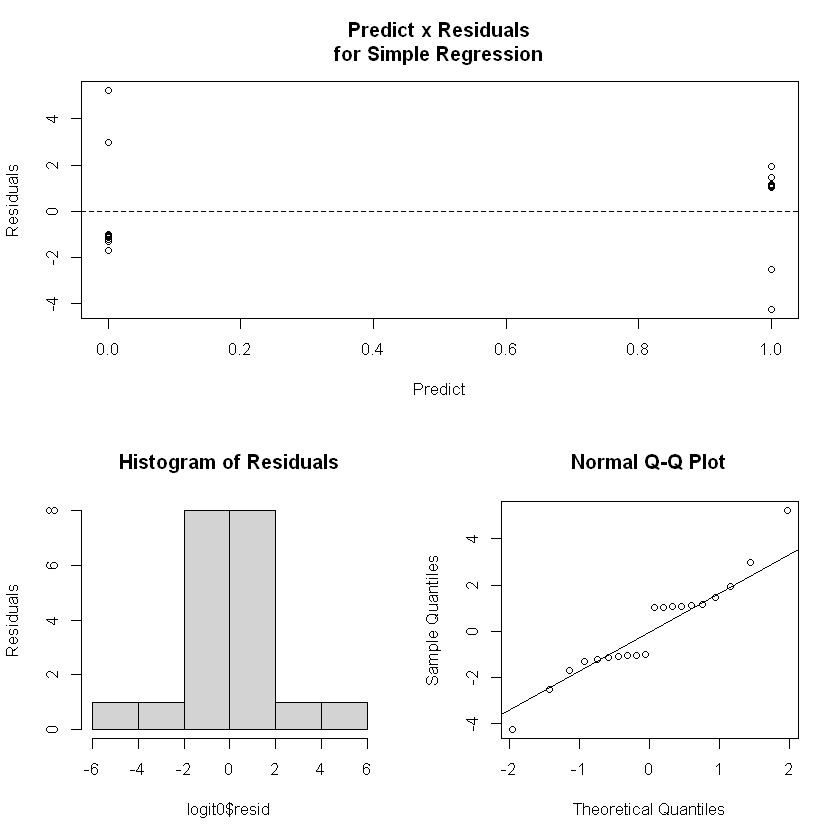

In [18]:
#Ayuda visual de los residuos
layout(matrix(c(1,1,2,3),2,2,byrow=T)) #matriz para layout
plot(logit0$resid~df1$Pass[order(df1$Pass)],
 main="Predict x Residuals\nfor Simple Regression",
 xlab="Predict", ylab="Residuals")
abline(h=0,lty=2)
#Histogram of Residuals
hist(logit0$resid, main="Histogram of Residuals",
 ylab="Residuals")
#Q-Q Plot
qqnorm(logit0$resid)
qqline(logit0$resid)

In [19]:
#Deviance
with(logit0,null.deviance-deviance)

[1] 11.66613

In [20]:
with(logit0,df.null-df.residual)

[1] 1

In [21]:
with(logit0,pchisq(null.deviance-deviance,df.null-df.residual,lower.tail=FALSE))

[1] 0.0006364826

In [22]:
#library(lmtest)

In [23]:
logit00=glm(Pass~1,data=df1,family='binomial') #modelo nulo
summary(logit00)


Call:
glm(formula = Pass ~ 1, family = "binomial", data = df1)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.177  -1.177   0.000   1.177   1.177  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -9.930e-17  4.472e-01       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 27.726  on 19  degrees of freedom
Residual deviance: 27.726  on 19  degrees of freedom
AIC: 29.726

Number of Fisher Scoring iterations: 2


In [24]:
lrtest(logit0,logit00)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,-8.029878,NA,NA,NA
2,1,-13.862944,-1,11.66613,0.0006364826


In [25]:
logLik(logit0)

'log Lik.' -8.029878 (df=2)

## Ejercicio 2

A researcher is interested in how variables, such as GRE (Graduate Record Exam scores), GPA (grade point average) and prestige of the undergraduate institution, effect admission into graduate school. The response variable, admit/don’t admit, is a binary variable.

### Tarea: Construir un modelo de regresión logística para este ejemplo


In [26]:
admission<-read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
tail(admission,10)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
391,1,800,3.05,2
392,1,660,3.88,2
393,1,600,3.38,3
394,1,620,3.75,2
395,1,460,3.99,3
396,0,620,4.00,2
397,0,560,3.04,3
398,0,460,2.63,2
399,0,700,3.65,2


In [27]:
summary(admission)

     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  

In [28]:
sapply(admission,mean) #apply(mydata,2,mean)

admit      gre      gpa     rank 
  0.3175 587.7000   3.3899   2.4850

In [29]:
apply(admission,2,mean)

admit      gre      gpa     rank 
  0.3175 587.7000   3.3899   2.4850

In [30]:
#admit_count=count(as.factor(admission$admit)) #algo tan básico como contar lo hace complejo
gre_mean=mean(admission$gre)
gpa_mean=mean(admission$gpa)
print(gre_mean)
print(gpa_mean)

[1] 587.7
[1] 3.3899


In [31]:
#Algo tan sencillo como contar, en ocasiones puede ser complejo en R
admit_count=table(admission$admit)
admit_count


  0   1 
273 127 

In [32]:
str(admission)

'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


In [33]:
#En términos relativos (%)
admit_count/length(admission$admit) #Datos desbalanceados


     0      1 
0.6825 0.3175 

### Tarea: Hacer una gráfica de barras respecto admit_cout

Estamos observando que nuestros datos están desbalanceados, el método usado pronosticará con sobreajuste la clase mayoritaría, realmente no es lo mejor. **Tarea: Investigar como tratar datos desbalanceados** 

In [34]:
rank_count=table(admission$rank)/length(admission$rank)
rank_count
#¿Qué tipo de variable es rank? Es una variable cualitativa multi-ordinal
#Este tipo de variables juegan un papel muy importante GLM, desde su interpretación hasta peso.


     1      2      3      4 
0.1525 0.3775 0.3025 0.1675 

In [36]:
library(dplyr)

admission%>% #operador %>% pipe
 group_by(admit,rank)%>%
 summarize(count_rank=n(),
           mean_gre=round(mean(gre),1),
           mean_gpa=round(mean(gpa),1)) #¿Cómo ponemos rank?

Warning message:
"package 'dplyr' was built under R version 4.0.5"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


`summarise()` has grouped output by 'admit'. You can override using the `.groups` argument.



admit,rank,count_rank,mean_gre,mean_gpa
<int>,<int>,<int>,<dbl>,<dbl>
0,1,28,582.9,3.3
0,2,97,586.6,3.3
0,3,93,562.4,3.4
0,4,55,562.9,3.3
1,1,33,636.4,3.5
1,2,54,613.0,3.4
1,3,28,616.4,3.5
1,4,12,603.3,3.4


In [37]:
#Hacer dummy rank (1:4)...varios paquetes, pero es sencillo con base R
admission$rank_1=ifelse(admission$rank==1,1,0)
admission$rank_2=ifelse(admission$rank==2,1,0)
admission$rank_3=ifelse(admission$rank==3,1,0)
admission$rank_4=ifelse(admission$rank==4,1,0) #en teoría no tendríamos que hacer esta dummy, pero


head(admission,10)

,admit,gre,gpa,rank,rank_1,rank_2,rank_3,rank_4
,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,380,3.61,3,0,0,1,0
2,1,660,3.67,3,0,0,1,0
3,1,800,4.00,1,1,0,0,0
4,1,640,3.19,4,0,0,0,1
5,0,520,2.93,4,0,0,0,1
6,1,760,3.00,2,0,1,0,0
7,1,560,2.98,1,1,0,0,0
8,0,400,3.08,2,0,1,0,0
9,1,540,3.39,3,0,0,1,0


### Tarea: Hacer gráficas para ver la distribución de GPA & GRE según ranks y admitidos (diagrama de cajas)

Construimos un primer modelo de regresión logística

In [38]:
logit1=glm(admit~gre+gpa,data=admission,family='binomial')
summary(logit1)


Call:
glm(formula = admit ~ gre + gpa, family = "binomial", data = admission)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2730  -0.8988  -0.7206   1.3013   2.0620  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.949378   1.075093  -4.604 4.15e-06 ***
gre          0.002691   0.001057   2.544   0.0109 *  
gpa          0.754687   0.319586   2.361   0.0182 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 480.34  on 397  degrees of freedom
AIC: 486.34

Number of Fisher Scoring iterations: 4


Construimos un segundo modelo de regresión logística, empleando la variable rank como factor, haciendo esto no es necesario construir dummies para esa variable....pero

In [39]:
admission$rank=as.factor(admission$rank)
logit2=glm(admit~gre+gpa+rank,data=admission,family='binomial') #la variable pivote es rango=1
summary(logit2)


Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = admission)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6268  -0.8662  -0.6388   1.1490   2.0790  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.989979   1.139951  -3.500 0.000465 ***
gre          0.002264   0.001094   2.070 0.038465 *  
gpa          0.804038   0.331819   2.423 0.015388 *  
rank2       -0.675443   0.316490  -2.134 0.032829 *  
rank3       -1.340204   0.345306  -3.881 0.000104 ***
rank4       -1.551464   0.417832  -3.713 0.000205 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 458.52  on 394  degrees of freedom
AIC: 470.52

Number of Fisher Scoring iterations: 4


Algunos odd ratio...¿cómo se interpretan en función de rank=1?

In [40]:
odd_rank2=exp(-0.675443)
odd_rank2

[1] 0.5089309

In [41]:
odd_rank4=exp(-1.551464)
odd_rank4

[1] 0.2119375

Ahora emulamos el ejercicio anterior, pero introduciendo nuestras variables dummy, donde rank_1 es la pivote

In [42]:
#emulando el ejercicio anterior
logit3=glm(admit~gre+gpa+rank_2+rank_3+rank_4,data=admission,family='binomial')
summary(logit3)
#https://www.theanalysisfactor.com/odds-ratio-categorical-predictor/


Call:
glm(formula = admit ~ gre + gpa + rank_2 + rank_3 + rank_4, family = "binomial", 
    data = admission)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6268  -0.8662  -0.6388   1.1490   2.0790  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.989979   1.139951  -3.500 0.000465 ***
gre          0.002264   0.001094   2.070 0.038465 *  
gpa          0.804038   0.331819   2.423 0.015388 *  
rank_2      -0.675443   0.316490  -2.134 0.032829 *  
rank_3      -1.340204   0.345306  -3.881 0.000104 ***
rank_4      -1.551464   0.417832  -3.713 0.000205 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 458.52  on 394  degrees of freedom
AIC: 470.52

Number of Fisher Scoring iterations: 4


In [43]:
#Pivote es rango 1
odd_rank4=exp(-1.551464)
odd_rank4

[1] 0.2119375

¿Qué pasa si en lugar de rank_1, ahora rank_4 es pivote?

In [44]:
#Variable pivote rango=4, contrastando con rango=4
logit4=glm(admit~gre+gpa+rank_1+rank_2+rank_3,data=admission,family='binomial')
summary(logit4)
#https://www.theanalysisfactor.com/odds-ratio-categorical-predictor/


Call:
glm(formula = admit ~ gre + gpa + rank_1 + rank_2 + rank_3, family = "binomial", 
    data = admission)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6268  -0.8662  -0.6388   1.1490   2.0790  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.541443   1.138072  -4.869 1.12e-06 ***
gre          0.002264   0.001094   2.070 0.038465 *  
gpa          0.804038   0.331819   2.423 0.015388 *  
rank_1       1.551464   0.417832   3.713 0.000205 ***
rank_2       0.876021   0.366735   2.389 0.016908 *  
rank_3       0.211260   0.392857   0.538 0.590748    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 458.52  on 394  degrees of freedom
AIC: 470.52

Number of Fisher Scoring iterations: 4


La interpretación de este odd ratio sería algo como: *'el odd ratio de ser admitido en un programa dado que el postulante viene de un colegio de rank 1 aumenta alrededor de 371.8% en comparación de un postulante que proviene de rank 4'*

In [45]:
odd_rank1=exp(1.551464)
odd_rank1

[1] 4.718373

In [46]:
odd_rank1-1

[1] 3.718373

In [47]:
odd_rank2=exp(0.876021)
odd_rank2

[1] 2.401326

Ahora las probabilidades de ser admitido en función del modelo logit3 (rank_1 como pivote)

In [48]:
admission=admission[,(1:8)]

Usar la función predict

In [49]:
admission$prob_admit=predict(logit4,admission,type='response') #probabilidad del evento, en términos de Y 
admission$log_odd=predict(logit3,admission,type='link') #logs odd ratio, está en términos de mi modelo lineal
#¿Cómo haría el odds ratio?
head(admission,10)

,admit,gre,gpa,rank,rank_1,rank_2,rank_3,rank_4,prob_admit,log_odd
,<int>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,380,3.61,3,0,0,1,0,0.1726265,-1.56712564
2,1,660,3.67,3,0,0,1,0,0.2921750,-0.88484417
3,1,800,4.00,1,1,0,0,0,0.7384082,1.03771175
4,1,640,3.19,4,0,0,0,1,0.1783846,-1.52733046
5,0,520,2.93,4,0,0,0,1,0.1183539,-2.00811132
6,1,760,3.00,2,0,1,0,0,0.3699699,-0.53234576
7,1,560,2.98,1,1,0,0,0,0.4192462,-0.32586874
8,0,400,3.08,2,0,1,0,0,0.2170033,-1.28321604
9,1,540,3.39,3,0,0,1,0,0.2007352,-1.38170577


In [50]:
admission$odds_ratio=exp(admission$log_odd)
head(admission,10)

,admit,gre,gpa,rank,rank_1,rank_2,rank_3,rank_4,prob_admit,log_odd,odds_ratio
,<int>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,380,3.61,3,0,0,1,0,0.1726265,-1.56712564,0.2086440
2,1,660,3.67,3,0,0,1,0,0.2921750,-0.88484417,0.4127785
3,1,800,4.00,1,1,0,0,0,0.7384082,1.03771175,2.8227505
4,1,640,3.19,4,0,0,0,1,0.1783846,-1.52733046,0.2171145
5,0,520,2.93,4,0,0,0,1,0.1183539,-2.00811132,0.1342420
6,1,760,3.00,2,0,1,0,0,0.3699699,-0.53234576,0.5872259
7,1,560,2.98,1,1,0,0,0,0.4192462,-0.32586874,0.7218999
8,0,400,3.08,2,0,1,0,0,0.2170033,-1.28321604,0.2771446
9,1,540,3.39,3,0,0,1,0,0.2007352,-1.38170577,0.2511498


Si asignamos el punto de corte como 0.5, podemos etiquetar nuestro eventos (1 si prob>0.5, 0 en otro caso).

In [51]:
admission$lab_admit=ifelse(admission$prob_admit>0.5,1,0)
admission$pred_logical=ifelse(admission$admit==admission$lab_admit,TRUE,FALSE)
head(admission,10)

,admit,gre,gpa,rank,rank_1,rank_2,rank_3,rank_4,prob_admit,log_odd,odds_ratio,lab_admit,pred_logical
,<int>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,0,380,3.61,3,0,0,1,0,0.1726265,-1.56712564,0.2086440,0,TRUE
2,1,660,3.67,3,0,0,1,0,0.2921750,-0.88484417,0.4127785,0,FALSE
3,1,800,4.00,1,1,0,0,0,0.7384082,1.03771175,2.8227505,1,TRUE
4,1,640,3.19,4,0,0,0,1,0.1783846,-1.52733046,0.2171145,0,FALSE
5,0,520,2.93,4,0,0,0,1,0.1183539,-2.00811132,0.1342420,0,TRUE
6,1,760,3.00,2,0,1,0,0,0.3699699,-0.53234576,0.5872259,0,FALSE
7,1,560,2.98,1,1,0,0,0,0.4192462,-0.32586874,0.7218999,0,FALSE
8,0,400,3.08,2,0,1,0,0,0.2170033,-1.28321604,0.2771446,0,TRUE
9,1,540,3.39,3,0,0,1,0,0.2007352,-1.38170577,0.2511498,0,FALSE


Warning message:
"package 'ggplot2' was built under R version 4.0.5"


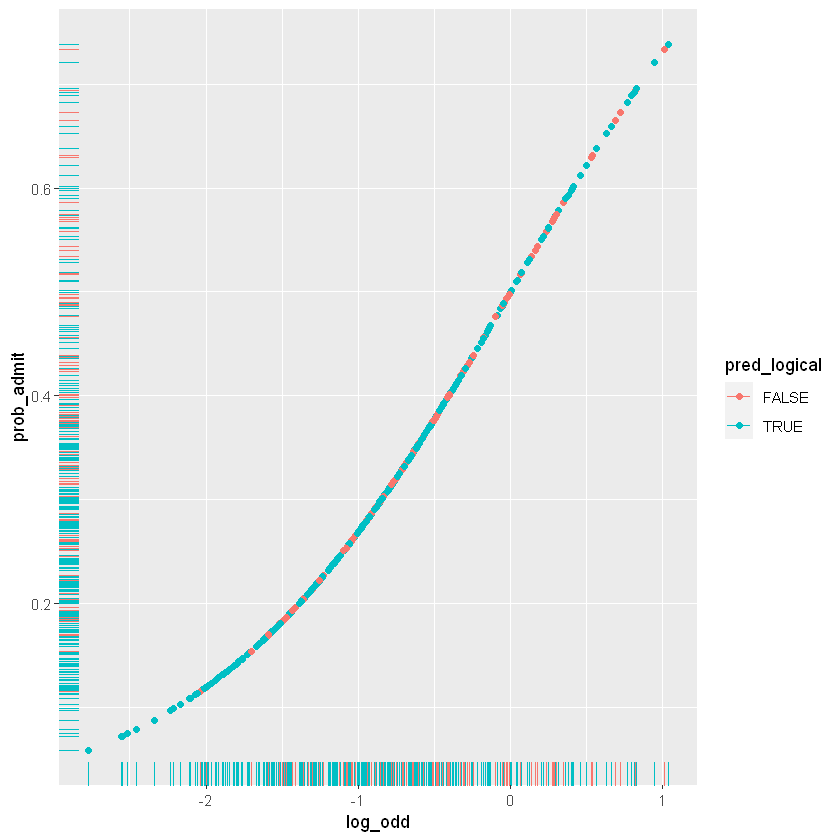

In [52]:
library(ggplot2)

admission%>%
    ggplot(aes(x=log_odd,y=prob_admit,col=pred_logical))+
    geom_point()+
    geom_rug()

### Métricas para evaluar el modelo

Finalmente, esto es un modelo de clasificación **binaria**. Entonces, se puede construir una matriz de confusión y en función de ello estimar diversas métricas.

Nuestro umbral en 0.5

In [53]:
#Matriz de confusión
matrix_val=table(admission$admit,admission$lab_admit)
matrix_val 

   
      0   1
  0 254  19
  1  97  30

Predice muy bien la clase 0, pero no la 1 ¿por qué?

In [54]:
table(admission$admit)


  0   1 
273 127 

**Matriz de confusión**
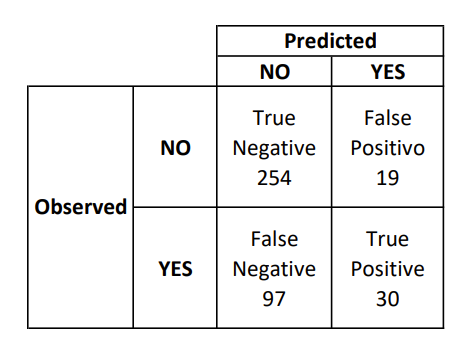

**Accuracy**

Accuracy=TP+TN/(TN+FP+FN+TP)

In [56]:
accuracy=round(sum(diag(matrix_val))/sum(matrix_val),4)
accuracy

[1] 0.71

**Sensibilidad (True Positive Rate, Recall)**

Sensibilidad=TP/(TP+FN)

**Especificidad (False Positive Rate**

Especificidad=TN/(TN+FP)

**Valor predictivo positivo (Precision)**

VPP=TP/(TP+FP)

**¿Valor predictivo negativo?**

**Tarea: Estimar sensibilidad y especificidad**

¿Cómo afecta nuestro punto de corte de probabilidad -para clasificar Y=1- las métricas anteriores?

**Curva ROC y AUC**

Warning message:
"package 'pROC' was built under R version 4.0.5"
Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



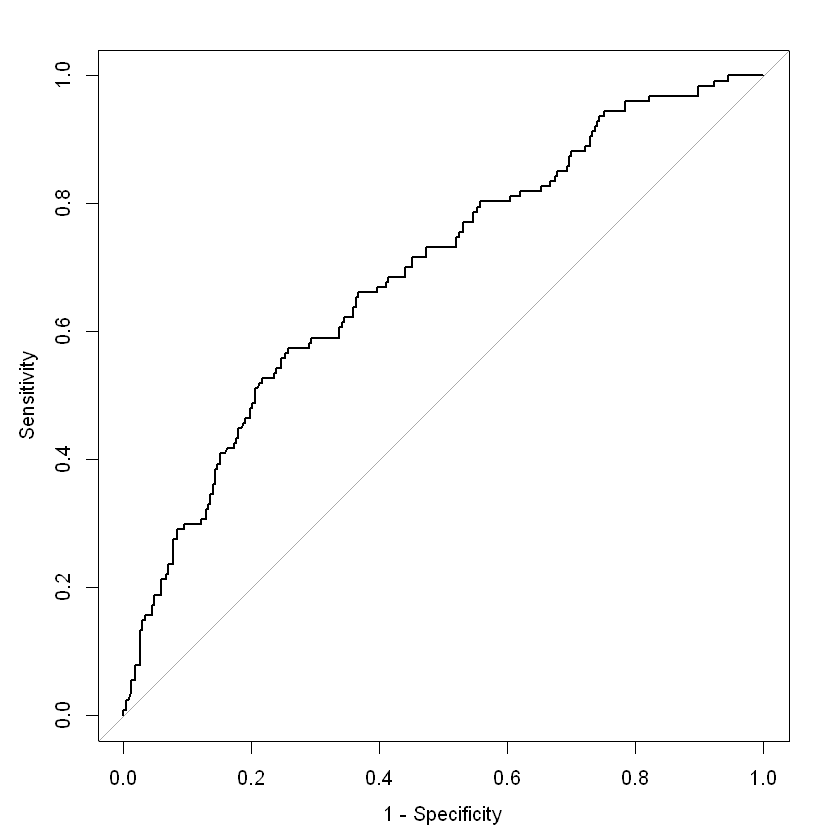

In [57]:
#install.packages('pROC')
library(pROC)
roc_mod=admission%>%
    roc(admit,prob_admit,plot=TRUE,legacy.axes=TRUE)

In [64]:
roc_mod


Call:
roc.data.frame(data = ., response = admit, predictor = prob_admit,     plot = TRUE, legacy.axes = TRUE)

Data: prob_admit in 273 controls (admit 0) < 127 cases (admit 1).
Area under the curve: 0.6928

In [65]:
summary(roc_mod)

                   Length Class  Mode     
percent              1    -none- logical  
sensitivities      392    -none- numeric  
specificities      392    -none- numeric  
thresholds         392    -none- numeric  
direction            1    -none- character
cases              127    -none- numeric  
controls           273    -none- numeric  
fun.sesp             1    -none- function 
auc                  1    auc    numeric  
call                 6    -none- call     
original.predictor 400    -none- numeric  
original.response  400    -none- numeric  
predictor          400    -none- numeric  
response           400    -none- numeric  
levels               2    -none- character

In [60]:
roc_info=data.frame(roc_mod$sensitivities*100,(1-roc_mod$specificities)*100,roc_mod$thresholds)
head(roc_info,40)
#Qué valores de sensibilidad y 1-esp generan los umbrales (0.5,0.7)

,roc_mod.sensitivities...100,X.1...roc_mod.specificities....100,roc_mod.thresholds
,<dbl>,<dbl>,<dbl>
1,100.00000,100.00000,-Inf
2,100.00000,99.63370,0.06538595
3,100.00000,99.26740,0.07216964
4,100.00000,98.90110,0.07360691
5,100.00000,98.53480,0.07690667
6,100.00000,98.16850,0.08336010
7,100.00000,97.80220,0.09232511
8,100.00000,97.43590,0.09695523
9,100.00000,97.06960,0.09783085


In [61]:
summary(roc_mod)

                   Length Class  Mode     
percent              1    -none- logical  
sensitivities      392    -none- numeric  
specificities      392    -none- numeric  
thresholds         392    -none- numeric  
direction            1    -none- character
cases              127    -none- numeric  
controls           273    -none- numeric  
fun.sesp             1    -none- function 
auc                  1    auc    numeric  
call                 6    -none- call     
original.predictor 400    -none- numeric  
original.response  400    -none- numeric  
predictor          400    -none- numeric  
response           400    -none- numeric  
levels               2    -none- character

Warning message:
"package 'ROCR' was built under R version 4.0.5"


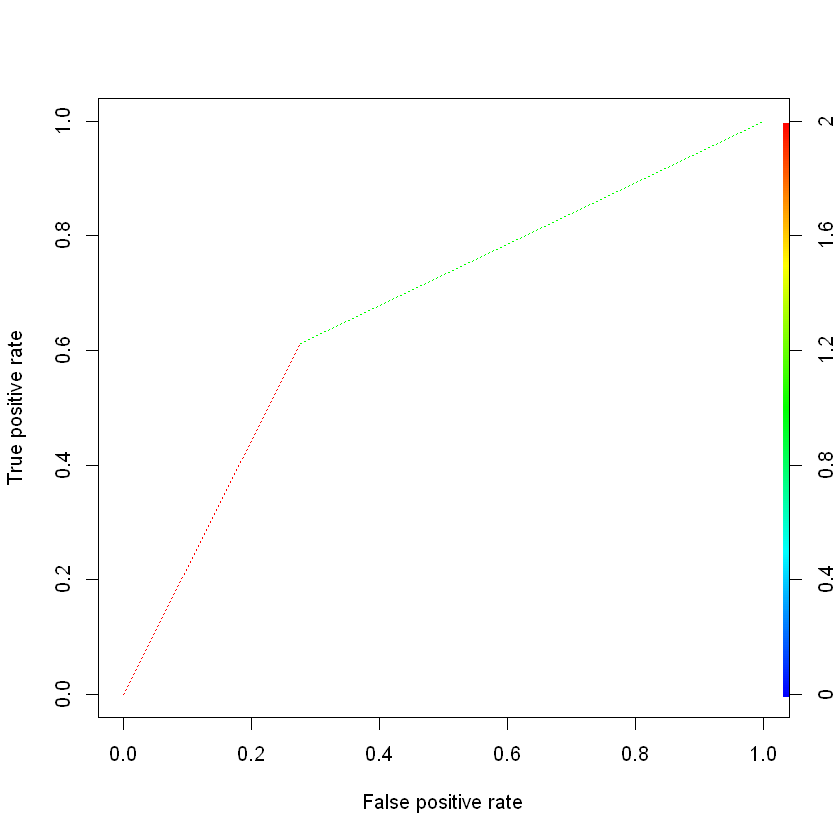

In [62]:
#install.packages('ROCR')
library(ROCR)
pred=prediction(admission$admit,admission$lab_admit)
perf=performance(pred,'tpr','fpr')
plot(perf,lty=3,colorize=TRUE)

In [63]:
summary(perf)

     Length       Class        Mode 
          1 performance          S4 

**Tarea: Estimar ROC y AUC para el modelo logit1**